<a href="https://colab.research.google.com/github/Adeola19B/TopCrowd-Challenge/blob/main/Copy_of_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TopCrowd Challenge: Data Science Intermediate I

The aim of this challenge is to predict the target "Age" for each ID in the test set

## 1. Prepare Data

### 1.1 Import

In [ ]:
# Important Libraries
#Basics
import pandas as pd
import numpy as np


# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Encoder
from category_encoders import OneHotEncoder

# ML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

# Persisting Model
from joblib import dump, load

In [ ]:
def wrangle(filepath):
    # Read the csv file using the provided filepath
    df = pd.read_csv(filepath, index_col="id")

    # Subset Height less than 1. and Height not equals 0
    mask_height = (df["Height"] < 1) & (df["Height"] != 0)
    df = df[mask_height]

    # Remove Outliers in Age
    mask_age = df["Age"] <= np.percentile(df["Age"],90)
    df = df[mask_age]
    return df

In [ ]:
df = wrangle("Train data - train.csv")

In [ ]:
print("Number of rows is:", df.shape[0])
print("Number of columns is:", df.shape[1])

Number of rows is: 18480
Number of columns is: 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18480 entries, 0 to 20190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             18480 non-null  object 
 1   Length          18480 non-null  float64
 2   Diameter        18480 non-null  float64
 3   Height          18480 non-null  float64
 4   Weight          18480 non-null  float64
 5   Shucked Weight  18480 non-null  float64
 6   Viscera Weight  18480 non-null  float64
 7   Shell Weight    18480 non-null  float64
 8   Age             18480 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ MB


### 1.2 Explore

In [ ]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,18480.000000,18480.000000,18480.000000,18480.000000,18480.000000,18480.000000,18480.000000,18480.000000
mean,1.300595,1.009852,0.341147,22.488880,9.868076,4.882748,6.394909,9.281926
std,0.290559,0.239127,0.090302,12.516849,5.676604,2.775720,3.450975,2.246260
min,0.187500,0.137500,0.025000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.743100,5.443104,2.679028,3.685435,8.000000
50%,1.362500,1.062500,0.350000,22.566202,9.638830,4.791066,6.520385,9.000000
75%,1.525000,1.187500,0.412500,31.609693,13.947954,6.903103,8.802520,11.000000
max,1.950000,1.537500,0.625000,78.797435,35.692020,19.589505,28.491248,14.000000


Next step is to create a "distribution" function that will take-in list of features with data type "number" and return their histogram plots.

In [ ]:
def distribution(features):
    for feature in features:
        sns.histplot(data=df, x=feature)
        plt.show();


In [ ]:
# Filter Numerical Columns Names
num_b = df.select_dtypes("number").columns

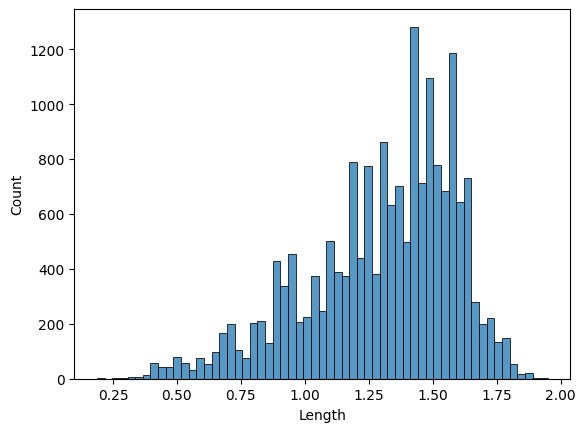

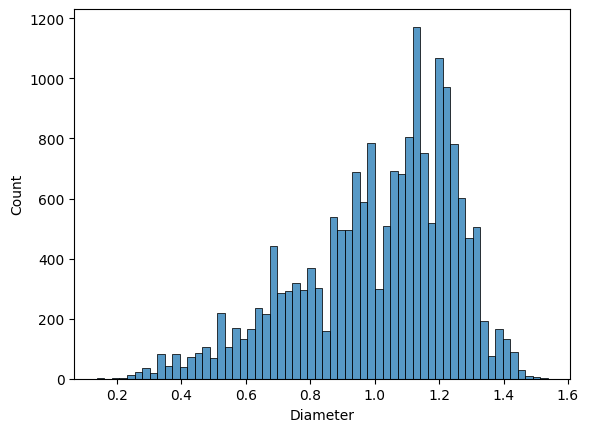

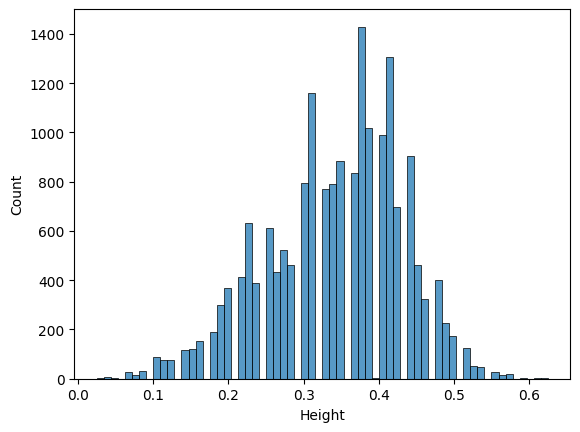

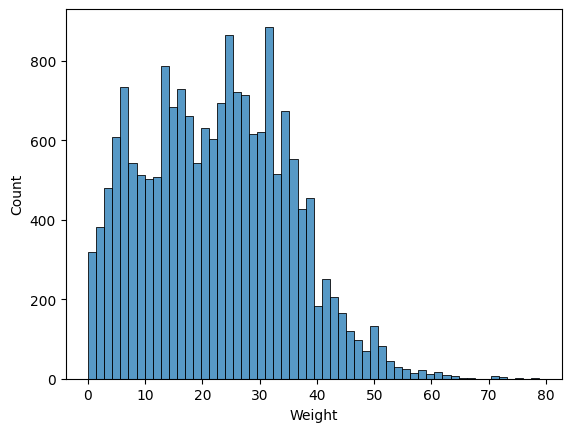

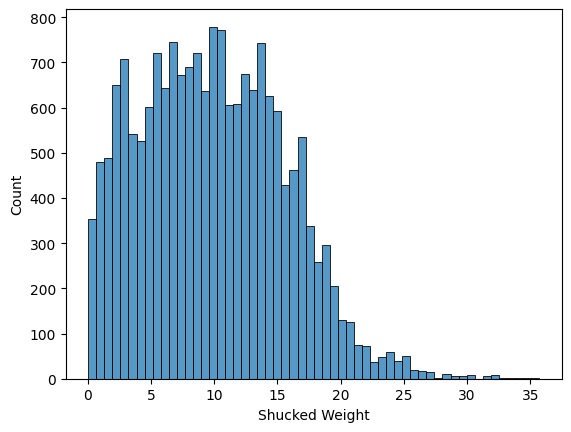

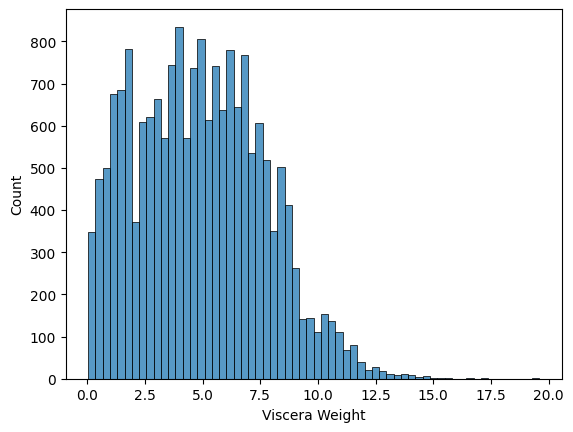

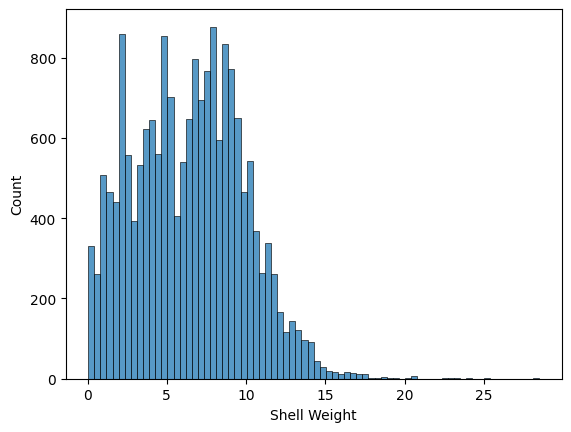

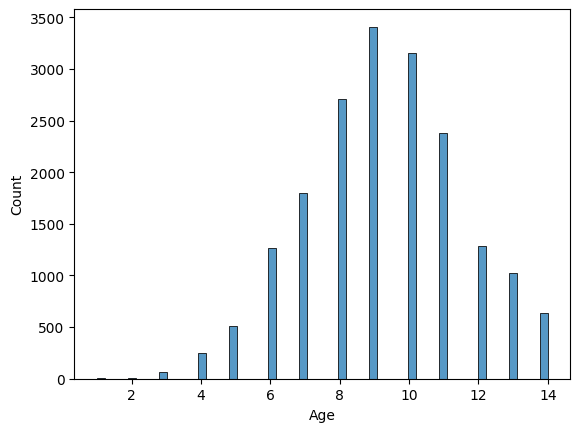

In [ ]:
distribution(num_b)

In [ ]:
# Check out our categorical feature
df["Sex"].value_counts(normalize=True)

M    0.355790
I    0.345942
F    0.298268
Name: Sex, dtype: float64

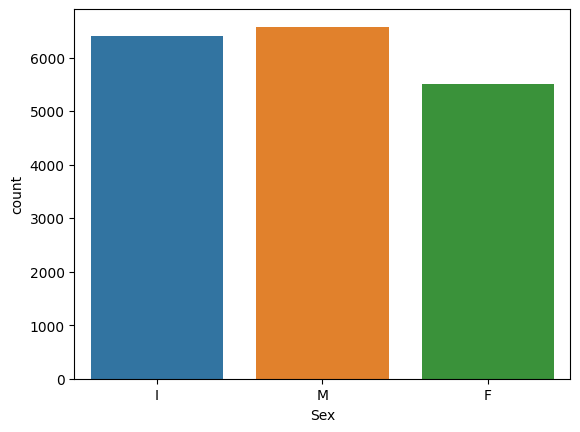

In [ ]:
sns.countplot(x="Sex", data=df)
plt.show();

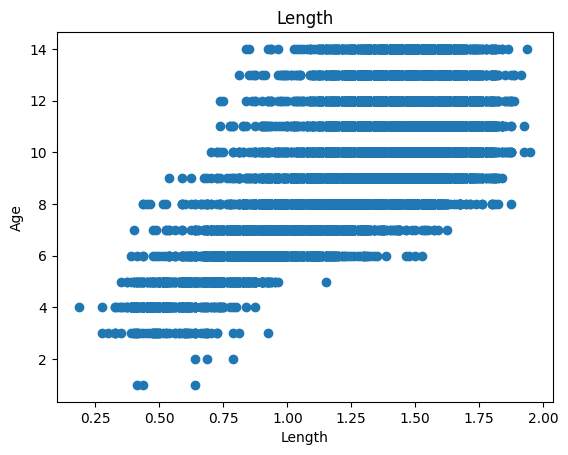

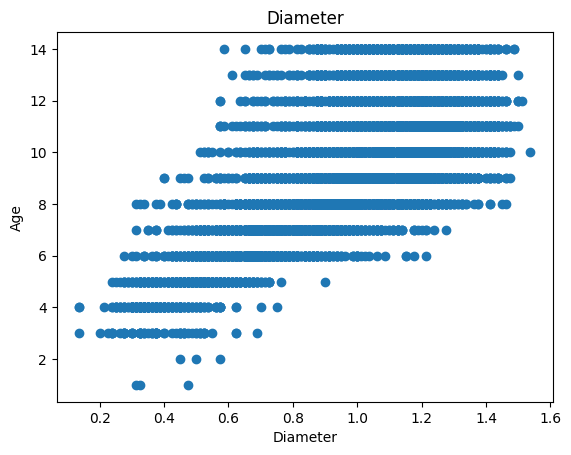

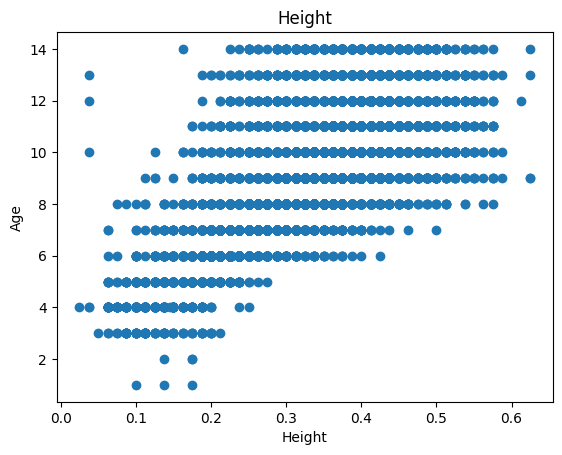

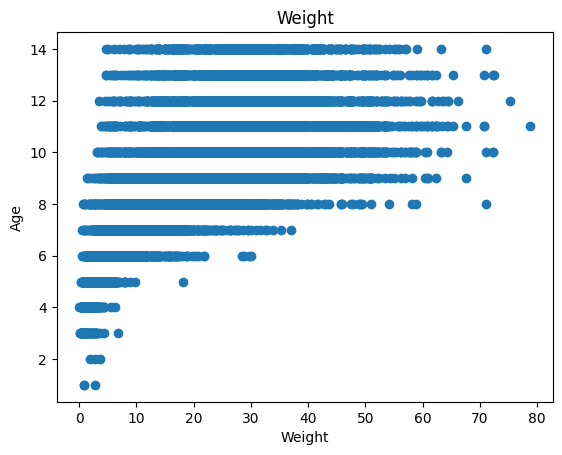

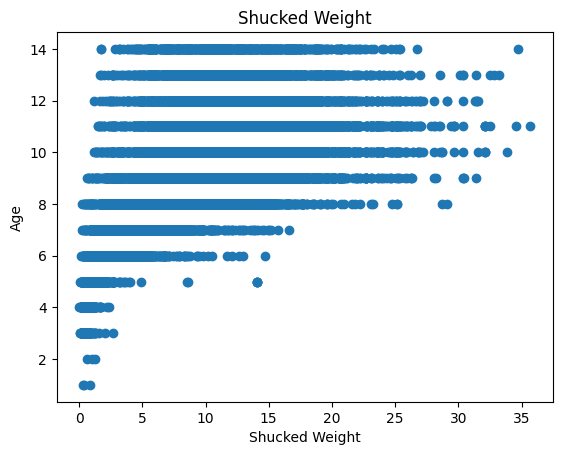

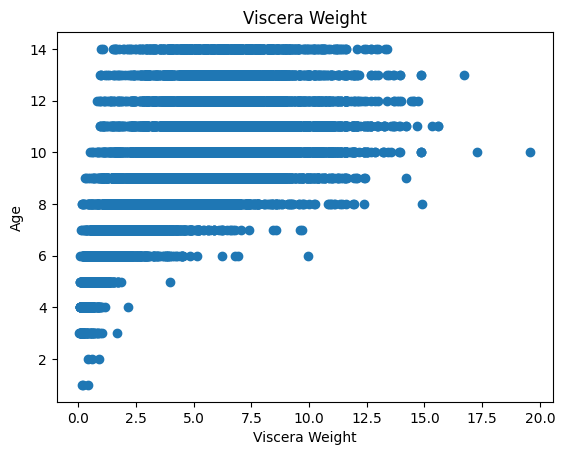

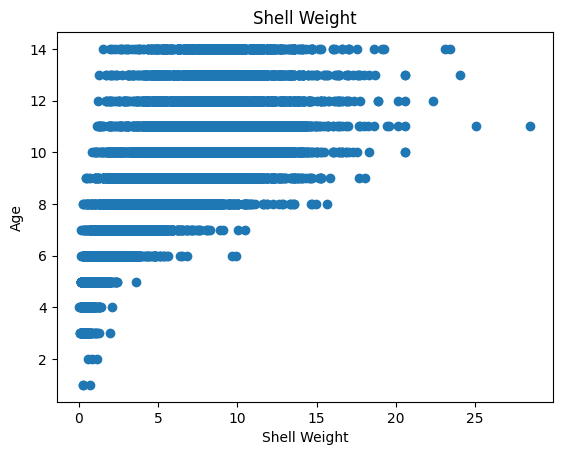

In [ ]:
features = df.select_dtypes("number").drop(["Age"], axis=1).columns
for ft in features:
    plt.scatter(x=df[ft], y=df["Age"])
    plt.title(ft)
    plt.xlabel(ft)
    plt.ylabel("Age")
    plt.show();

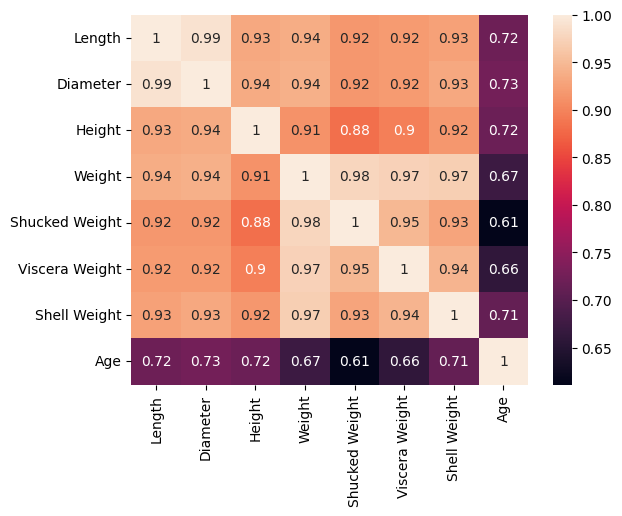

In [ ]:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True);

### 1.3 Split

In [ ]:
X_train = df.drop(["Age"], axis=1)
y_train = df["Age"]

In [ ]:
# Created a function to load the testset provided the filepath
def test_data(filepath):
    test = pd.read_csv(filepath, index_col="id")

    return test

In [ ]:
X_test = test_data("Test data - test.csv")
X_test.sample(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
76312,M,1.5125,1.1750,0.4250,34.614739,13.054945,7.271647,11.183878
75685,M,1.2625,0.9875,0.3250,18.242903,7.555142,4.068153,4.819415
74703,I,0.9125,0.6750,0.2250,6.066793,2.608154,1.445825,1.984465
83523,I,1.0625,0.7750,0.2500,8.774170,3.501163,1.899417,2.693202
74752,M,1.3000,0.9875,0.2625,14.004653,6.733006,3.699610,3.968930


## 2. Build Model

### 2.1 Baseline

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 9.281926406926408
Baseline MAE: 1.7995928088866402


### 2.2 Iteration

In [ ]:
# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Sex'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

### 2.3 Evaluate

In [ ]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 1.07


In [ ]:
df_pred_test = pd.DataFrame(
    {
        "Yield": model.predict(X_test)
    },
    index=X_test.index
)
df_pred_test.head()

,Yield
id,
74051,7.574610
74052,7.704267
74053,10.028595
74054,9.550058
74055,7.588939


In [ ]:
# Save our results to csv file
df_pred_test.to_csv("predicted results.csv", index=True)

## 3. Communicate Result

In [ ]:
# To get the the intercept and coefficient of our linear regression
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 10
[-0.61490123  0.24779713  0.3671041   1.64519023  2.91741981]


In [ ]:
# Using the "get_feature_names" functions to extract the feature names
feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 10
['Sex_I' 'Sex_M' 'Sex_F' 'Length' 'Diameter']


In [ ]:
# Create a pandas Series containing the coefficients and features names
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head(8)

Sex_I            -0.614901
Sex_M             0.247797
Sex_F             0.367104
Length            1.645190
Diameter          2.917420
Height            4.942044
Weight            0.047337
Shucked Weight   -0.298995
dtype: float64

Creating a regression equation to help us explain the interaction between individual variables with respect to age

In [ ]:
print(f"Age = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

Age = 2.9
+ (-0.61 * Sex_I)
+ (0.25 * Sex_M)
+ (0.37 * Sex_F)
+ (1.65 * Length)
+ (2.92 * Diameter)
+ (4.94 * Height)
+ (0.05 * Weight)
+ (-0.3 * Shucked Weight)
+ (-0.06 * Viscera Weight)
+ (0.28 * Shell Weight)


Model Deployment

In [ ]:
dump(model, "Age-predictor.joblib")

['Age-predictor.joblib']